# Top Earners in the Movie Industry
## Table of Contents
<ul>
    <li>Introduction</li>
    <li>Data Cleaning</li>
    <li>Graphs<li>
    Conclusion

<a id="#introduction"></a>
## Introduction

> In this data analysis we will find the top earners in the movie industry across movie genre, director, and production companies. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./imdb-movies.csv')

In [22]:
#drop empty budget and revenue
df.drop(df.query('budget == 0 or revenue == 0').index, inplace=True)
df.query('budget == 0 or revenue == 0')

#### Fill in Directors name

In [23]:
# Aziz Mirza
df.fillna({'director': "Aziz Mirza"}, inplace=True)
df[df.director == "Aziz Mirza"]

<a id="#data cleaning"></a>
## Data Cleaning

#### Drop Columns

In [5]:
# delete all records with null, or empty values

#df.isnull().sum()
df.drop(["id", "homepage", "imdb_id", "tagline", "cast", "keywords", "overview", "vote_count", "vote_average", "release_date"], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

#### drop movies with na production_companies

In [7]:
# df.dropna(inplace=True)
 df[df.isna()]

##### If i created one record for each the 'production_companies' a movie was release under and one record each for 'genres'<br>and tried to run calculations, it wouldn't work because for many records, the amount of 'production_companies'<br>and'genres'aren't the same, so I'll create 2 dataframes; one w/o a 'production_companies'column and one w/o a 'genres'columns

#### One record per production_company

In [11]:
production_records = df[df.production_companies.str.contains('|')]
production_records.production_companies = production_records.production_companies.apply(lambda x: x.split('|'))
#production_records.production_companies.iloc[0] #verify produciton company records are split into a list

df_pc = pd.DataFrame(columns=df.columns)
for i in range(len(production_records)):
    record = production_records.iloc[i] #returns all data for every record w/ ability to access column data
    for production_company in production_records.production_companies[i]: # loops through all production companies
        df_pc = df_pc.append(pd.DataFrame([
            [record.popularity, record.budget, record.revenue, record.original_title, record.director, record.runtime, record.genres, production_company, record.release_year, record.budget_adj, record.revenue_adj]
        ], columns=df.columns))
        
df_pc.drop('genres', axis=1, inplace=True)
df_pc.reset_index(drop=True, inplace=True)

#### One record per genre

In [13]:
genres_records = df[df.genres.str.contains('|')]
genres_records.genres = genres_records.genres.apply(lambda x: x.split('|'))

df_g = pd.DataFrame(columns=df.columns)
for i in range(len(genres_records)):
    record = genres_records.iloc[i] 
    for g in genres_records.genres[i]: 
        df_g = df_g.append(pd.DataFrame([
            [record.popularity, record.budget, record.revenue, record.original_title, record.director, record.runtime, g, record.production_companies, record.release_year, record.budget_adj, record.revenue_adj]
        ], columns=df.columns))
        
df_g.drop('production_companies', axis=1, inplace=True)
df_g.reset_index(drop=True, inplace=True)

<a id="#graphs"></a>
# Graphs

### Which production companies released the most movies in the last 10 years? 
<p> - Display the top 5 production companies

In [14]:
last_ten = df_pc.query('release_year>=2008')
tp_pro_ten= last_ten.production_companies.value_counts()
graph1 = tp_pro_ten.nlargest(5)
graph1

Relativity Media      90
Universal Pictures    89
Warner Bros.          87
Columbia Pictures     73
Paramount Pictures    60
Name: production_companies, dtype: int64

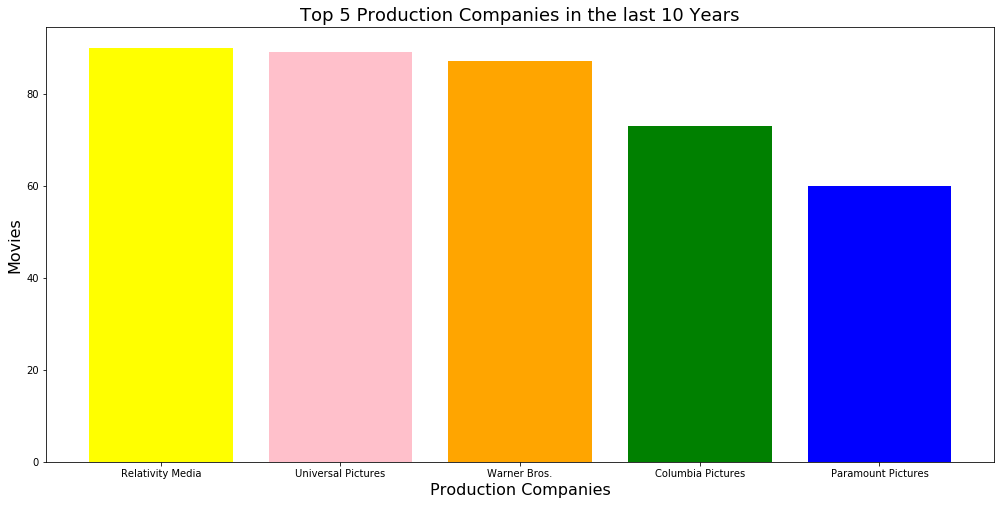

In [15]:
plt.subplots(figsize=(17, 8))
plt.bar(graph1.index, graph1, color=("yellow", "pink", "orange", "green", "blue"))
plt.title("Top 5 Production Companies in the last 10 Years", fontsize=18)
plt.xlabel("Production Companies", fontsize=16)
plt.ylabel("Movies", fontsize=16)
plt.show()

#### - Warner Bros has released the most movies!

### What 5 movie genres grossed the highest of all-time?

In [16]:
top_g = df_g.groupby('genres').revenue.sum()
top_g.nlargest(5)
graph2 = top_g.nlargest(5)/1e9
graph2

genres
Action       169.790679
Adventure    163.439947
Comedy       132.031867
Drama        130.334141
Thriller     117.587447
Name: revenue, dtype: float64

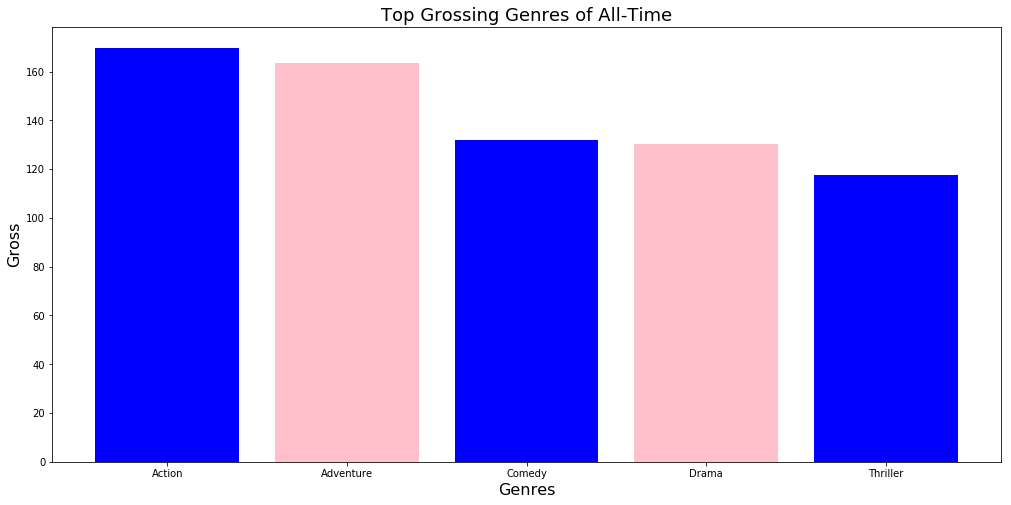

In [17]:
plt.subplots(figsize=(17, 8))
plt.bar(graph2.index, graph2, color=("blue", "pink", "blue", "pink", "blue"))
plt.title("Top Grossing Genres of All-Time", fontsize=18)
plt.xlabel("Genres", fontsize=16)
plt.ylabel("Gross", fontsize=16)
plt.show()

#### - Adventure is the highest grossing genre of all time!

### Who are the top 5 grossing directors?

In [18]:
top_d = df.groupby('director').revenue.sum()
top_d.nlargest(5)
graph3 = top_d.nlargest(5)/1e9
graph3

director
Steven Spielberg     9.018564
Peter Jackson        6.523245
James Cameron        5.841895
Michael Bay          4.917208
Christopher Nolan    4.167549
Name: revenue, dtype: float64

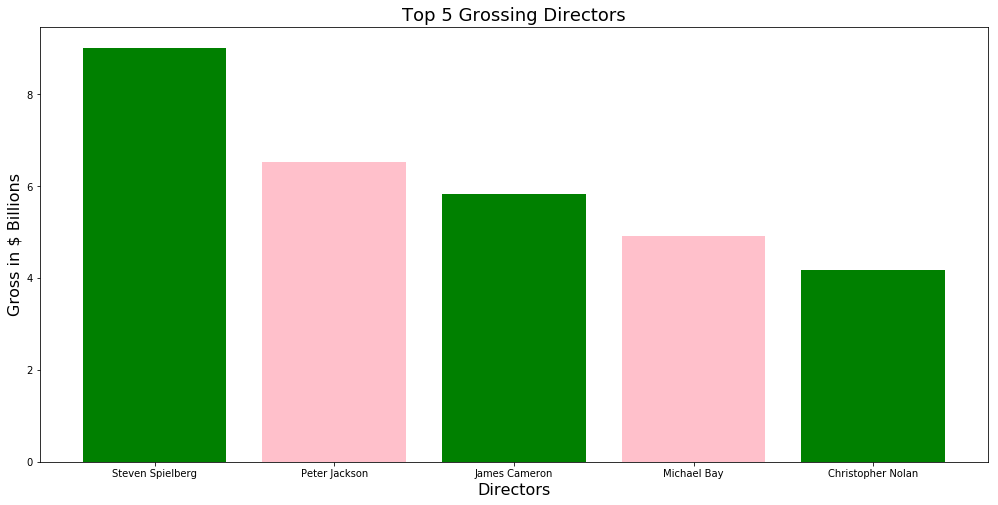

In [19]:
plt.subplots(figsize=(17, 8))
plt.bar(graph3.index, graph3, color=("green", "pink", "green", "pink", "green"))
plt.title("Top 5 Grossing Directors", fontsize=18)
plt.xlabel("Directors", fontsize=16)
plt.ylabel("Gross in $ Billions", fontsize=16)
plt.show()

#### - Peter Jackson is the highest grossing director!

### Compare the revenue of the highest grossing movies of all time

In [20]:
high_g = df.groupby('original_title').revenue.sum()
high_g.nlargest(5)
graph4 = high_g.nlargest(5)/1e9
graph4

original_title
Avatar                          2.781506
Star Wars: The Force Awakens    2.068178
Titanic                         1.845034
The Avengers                    1.568081
Jurassic World                  1.513529
Name: revenue, dtype: float64

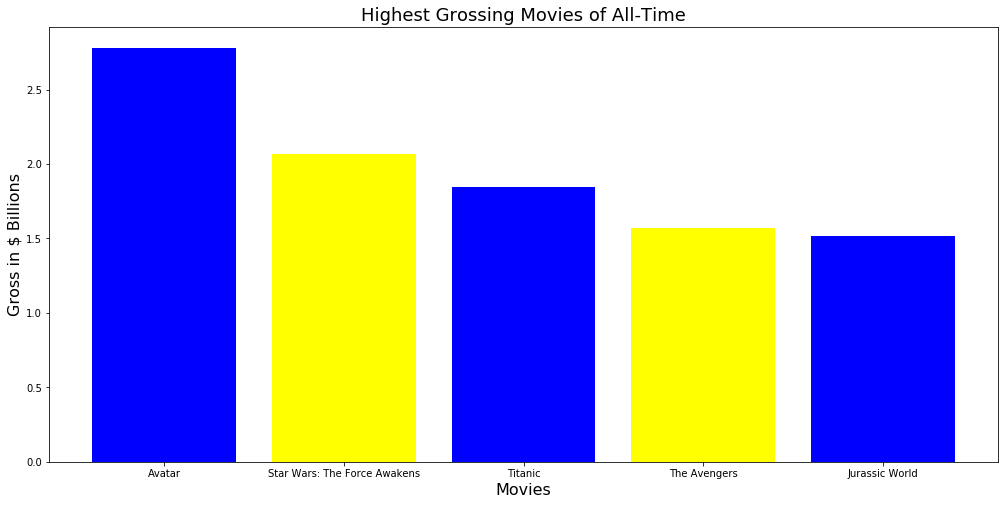

In [21]:
plt.subplots(figsize=(17, 8))
plt.bar(graph4.index, graph4, color=("blue", "yellow", "blue", "yellow", "blue"))
plt.title("Highest Grossing Movies of All-Time", fontsize=18)
plt.xlabel("Movies", fontsize=16)
plt.ylabel("Gross in $ Billions", fontsize=16)
plt.show()

#### - Avatar is the highest grossing movie of all time!

### Conclusion

#### - It is no surprise to know that the top earners in the movie industry are all familiar names. Names accompanied by the most famous movies like Avatar, Harry Potter, Star Wars, Titanic, etc.. 
#### There was however only one production company I did not recognize - Relativity Media. Why are they in the top production companies in the last 10 year? Well, they are the production company who has released The Fast and the Furious movies, among many other familiar ones. 